In [1]:
from __future__ import print_function

### Data generator

For selected font, script will generate each of above character (a-z, A-Z, 0-9) at nine different position to move text by one pixel in right-left and top-bottom direction. 

#### NOTE: If you want generate some new data use kernel == python2, because ttfquery can cause problems at python3
Also you can use generated images from Synthetic_dataset

#### Imports

In [1]:
from PIL import Image, ImageDraw, ImageFont
import ttfquery.findsystem 
import string
import ntpath
import numpy as np
import os
import glob

### Generator

Input params:

    fontSize
    imgSize
    position
    font_list - list of fonts which will be used

### Wordbag creating and exporting to .txt file

In [55]:
def words_parser(inp_str):
    lower_case_list = list(string.ascii_lowercase)
    words = []
    i = 0
    j = 0
    flag = False
    while i < len(inp_str):
        while inp_str[i] in string.ascii_letters:
            i+=1  
            flag = True
        if flag and i>j+3: # take words with len > 3
            words.append(inp_str.lower()[j:i])
        i += 1
        j = i
        flag = False
    return words

def words_generator(path='words.txt'):
    
    try:
        from sklearn.datasets import fetch_20newsgroups
        
        wordbag = fetch_20newsgroups(subset='all', categories=['sci.space'], shuffle=True, random_state=42)
        words = []; i = 0
        for text in wordbag.data[:100][:]:
            tmp = words_parser(text)
            words = np.hstack([words,tmp])
        words = words.tolist()
        print(len(words), 'words were generated')
        f = open('words.txt','w')
        for word in words:
            f.write(word + '\n')
        f.close()
    
    except:
        print('Install sklearn to generate text!')

In [135]:
words_generator()

18509 words were generated


In [11]:
def words_bag_reader(filename):
    #reading wordbag
    words_bag = []
    try:
        with open(filename, 'r') as f:
            words_bag.append(f.read())
            words_bag = list(words_bag)
        words_bag = words_bag[0].split('\n')
    except:
        print("File with words doesnt exist!!!")
        
    return words_bag

def data_generator(fonts, directory='Synthetic_dataset', img_per_class=20, img_size=(128,128), fontSize=20):
    """
    fonst -- list of fonts which will be classaficated
    words randomly can be in lower case, upper case and only first char is upper
    words are taken from wordbag file
    """
        
    words_bag = words_bag_reader('words.txt')
    
    #creating directory
    dataset_path = os.path.join (os.getcwd(), directory)
    if not os.path.exists(dataset_path):
        os.makedirs(dataset_path) 
    
    #system fonts
    all_fonts = ttfquery.findsystem.findFonts()
    #creating paths to fonts
    cases = [string.lower, string.upper, string.capitalize]
    fonts.sort()
    
    for cur_font in fonts:
        for i in range(img_per_class):
            for sys_font in all_fonts:
                sys_lower = sys_font.lower()
                cur_lower = cur_font.lower()
                if cur_lower+'.' in sys_lower:# dot is used to get regular style
                    path = sys_font
                    font = ImageFont.truetype(path, fontSize)
                    text = np.random.choice(words_bag)
                    text = np.random.choice(cases)(text)
                    text_width, text_height = font.getsize(text)
                    flag = (text_width >= img_size[0] or text_height >= img_size[1])
                    while flag:
                        text = np.random.choice(words_bag)
                        text = np.random.choice(cases)(text)
                        text_width, text_height = font.getsize(text)
                        flag = (text_width >= img_size[0] or text_height >= img_size[1])
                    image = Image.new("RGB", (text_width, text_height), (255,255,255))
                    draw = ImageDraw.Draw(image)
                    draw.text((0,0), text, (0,0,0), font=font)
                    file_name = str(cur_lower) + '_' + str(i)+'.jpg'
                    file_name = os.path.join(dataset_path,file_name)
                    image.save(file_name)
                    break   
                    
def data_generator_folders(fonts, directory='Synthetic_dataset', img_per_class=20, img_size=(128,128), fontSize=20):
    """
    fonst -- list of fonts which will be classaficated
    words randomly can be in lower case, upper case and only first char is upper
    words are taken from wordbag file
    """
    
    words_bag = words_bag_reader('words.txt')
        
    #creating directory
    dataset_path = os.path.join (os.getcwd(), directory)
    if not os.path.exists(dataset_path):
        os.makedirs(dataset_path) 
    
    #system fonts
    all_fonts = ttfquery.findsystem.findFonts()
    #creating paths to fonts
    cases = [string.lower, string.upper, string.capitalize]
    fonts.sort()
    for cur_font in fonts:
        for i in range(img_per_class):
            for sys_font in all_fonts:
                sys_lower = sys_font.lower()
                cur_lower = cur_font.lower()
                if cur_lower+'.' in sys_lower:# dot is used to get regular style
                    path = sys_font
                    font = ImageFont.truetype(path, fontSize)
                    text = np.random.choice(words_bag)
                    text = np.random.choice(cases)(text)
                    text_width, text_height = font.getsize(text)
                    flag = (text_width >= img_size[0] or text_height >= img_size[1])
                    while flag:
                        text = np.random.choice(words_bag)
                        text = np.random.choice(cases)(text)
                        text_width, text_height = font.getsize(text)
                        flag = (text_width >= img_size[0] or text_height >= img_size[1])
                    image = Image.new("RGB", (text_width, text_height), (255,255,255))
                    draw = ImageDraw.Draw(image)
                    draw.text((0,0), text, (0,0,0), font=font)
                    file_name = str(i)+'.jpg'
                    font_dir = os.path.join(dataset_path, cur_lower)
                    if not os.path.exists(font_dir):
                        os.makedirs(font_dir)
                    file_name = os.path.join(font_dir,file_name)
                    image.save(file_name)
                    break   
                    
                    
                    
def data_generator_folders_train_test(fonts, words_bag, directory='Synthetic_dataset', img_per_class=20, \
                                      img_size=(128,128), fontSize=18):
    """
    fonst -- list of fonts which will be classaficated
    words randomly can be in lower case, upper case and only first char is upper
    words are taken from wordbag file
    """
    #creating directory
    dataset_path = os.path.join (os.getcwd(), directory)
    if not os.path.exists(dataset_path):
        os.makedirs(dataset_path) 
    
    #system fonts
    all_fonts = ttfquery.findsystem.findFonts()
    #creating paths to fonts
    cases = [string.lower, string.upper, string.capitalize]
    fonts.sort()
    for cur_font in fonts:
        for i in range(img_per_class):
            for sys_font in all_fonts:
                sys_lower = sys_font.lower()
                cur_lower = cur_font.lower()
                if cur_lower+'.' in sys_lower:# dot is used to get regular style
                    path = sys_font
                    font = ImageFont.truetype(path, fontSize)
                    text = np.random.choice(words_bag)
                    text = np.random.choice(cases)(text)
                    text_width, text_height = font.getsize(text)
                    flag = (text_width >= img_size[0] or text_height >= img_size[1])
                    while flag:
                        text = np.random.choice(words_bag)
                        text = np.random.choice(cases)(text)
                        text_width, text_height = font.getsize(text)
                        flag = (text_width >= img_size[0] or text_height >= img_size[1])
                    image = Image.new("RGB", (text_width, text_height), (255,255,255))
#                     image = Image.new("RGB", img_size, (255,255,255))
                    draw = ImageDraw.Draw(image)
                    draw.text((0,0), text, (0,0,0), font=font)
                    file_name = str(i)+'.jpg'
                    font_dir = os.path.join(dataset_path, cur_lower)
                    if not os.path.exists(font_dir):
                        os.makedirs(font_dir)
                    file_name = os.path.join(font_dir,file_name)
                    image.save(file_name)
                    break   

In [7]:
#for ubuntu
fonts_list = ['Arial', 'Verdana', 'Comic_Sans_MS', 'Courier_New', 'Times_New_Roman', 'Impact', 'Georgia', 'Trebuc', \
             'Andalemo', 'Lato-Regular']
#for windows
fonts_list = ['Arial', 'Verdana', 'Comic', 'Cour', 'Times', 'Impact', 'Georgia', 'Trebuc', \
             'Alfredo', 'Borealis']
data_generator_folders(fonts=fonts_list, directory='Synthetic_dataset_words')

In [12]:
#for ubuntu
fonts_list = ['Arial', 'Verdana', 'Comic_Sans_MS', 'Courier_New', 'Times_New_Roman', 'Impact', 'Georgia', 'Trebuc', \
             'Andalemo', 'Lato-Regular']
#for windows
fonts_list = ['Arial', 'Verdana', 'Comic', 'Cour', 'Times', 'Impact', 'Georgia', 'Trebuc', \
             'Corbel', 'Alger']
img_per_class=100
N = len(fonts_list)*img_per_class
words_bag = words_bag_reader('words.txt')
words_bag_set = np.random.choice(words_bag, size=3*N, replace=False)
words_bag_train = words_bag_set[:N]
words_bag_val = words_bag_set[N:2*N]
words_bag_test = words_bag_set[2*N:]
data_generator_folders_train_test(fonts_list, words_bag_train, 'Synthetic_dataset/train/', img_per_class)
data_generator_folders_train_test(fonts_list, words_bag_val, 'Synthetic_dataset/val/', img_per_class)
data_generator_folders_train_test(fonts_list, words_bag_test, 'Synthetic_dataset/test/', img_per_class)

### Data preparation

Here python3 is recommended

#### Imports

In [1]:
import numpy as np
import keras
import tensorflow as tf
import os
from hyperopt import Trials, STATUS_OK, tpe
from hyperas import optim
from hyperas.distributions import choice, uniform
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization 
from keras.layers import Conv2D, ActivityRegularization, MaxPooling2D
from keras.backend import resize_images, reshape
from keras.optimizers import SGD, Adam
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
config = tf.ConfigProto( device_count = {'GPU': 1 , 'CPU': 4} ) 
sess = tf.Session(config=config) 
keras.backend.set_session(sess)

### ImageDataGenerator usage
We will use it

### Datagen for train, validation and test

For training we use train and validation data.
After training, test score is calculated by cross validation at test data

In [3]:
def datagen(model, directory_train, directory_val, directory_test, batch_size=16, epochs=10, verbose=1,\
            nb_train_samples = 2000, nb_validation_samples = 800, nb_test_samples = 1000, img_size=(128,128)):
    """
    creating train/validaton generators for model fitting
    """
    # this is the augmentation configuration we will use for training
    train_datagen = ImageDataGenerator(rescale = 1./255.)

    # this is the augmentation configuration we will use for testing:
    # only rescaling
    test_datagen = ImageDataGenerator(rescale = 1./255.,)

    train_generator = train_datagen.flow_from_directory(
        directory=directory_train,
        batch_size=batch_size,   
        color_mode='grayscale',
        #save_to_dir='synt_aug/',
        target_size=img_size)
    
    validation_generator = test_datagen.flow_from_directory(
        directory=directory_val,
        batch_size=batch_size,
        color_mode='grayscale',
        target_size=img_size)
    
    test_generator = test_datagen.flow_from_directory(
        directory=directory_test,
        batch_size=batch_size,
        color_mode='grayscale',
        target_size=img_size)
 
    history = model.fit_generator(
        train_generator,
        steps_per_epoch=nb_train_samples // batch_size,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=nb_validation_samples // batch_size,
        verbose=verbose,
        workers=1,#f you want multiprocessing change it
        use_multiprocessing=False,)
    
    score, acc = model.evaluate_generator(generator=test_generator, steps=nb_test_samples, verbose = 1)
    print('Score is', score, acc)
    
    return history, [score, acc]

## Choose architecture
#### First iteration

Architectures:

    1) CONV - POOL - DENSE - OUTPUT
    2) CONV - CONV - POOL - DENSE - OUTPUT
    3) CONV - CONV - CONV - POOL - DENSE - OUTPUT
Here we dont use any regularizers, normalizations

In [6]:
input_shape = (32,32,1)
models = []
models.append(Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D(pool_size=(2, 2),strides=2),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
]))

models.append(Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D(pool_size=(2, 2),strides=2),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
]))

models.append(Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D(pool_size=(2, 2),strides=2),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
]))

In [7]:
scorelist = []
for model in models:
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
    history, score = datagen(model,'./Synthetic_dataset/train', './Synthetic_dataset/val', './Synthetic_dataset/test',\
                      verbose=0, img_size=(32,32), batch_size=32, epochs=30, nb_train_samples=1000,\
                      nb_validation_samples=200, nb_test_samples = 200)
    scorelist.append(score[1])
print(scorelist)
argmax = np.argmax(scorelist)
print('The best model is model ', argmax+1)
model = models[argmax]

Found 1000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.
200/200 [==============================] - 2s 11ms/step
Score is 0.204753845501 0.923113810742
Found 1000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.
200/200 [==============================] - 2s 11ms/step
Score is 0.18087388189 0.937180306905
Found 1000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.
200/200 [==============================] - 2s 11ms/step
Score is 0.176490883929 0.955242966752
[0.92311381074168797, 0.9371803069053708, 0.95524296675191811]
The best model is model  3


### Tuning process

In this section we will use BatchNormalization and Dropout.
Parameters will be tuning:

    dropout_1 -- uniform in [0, 1]
    dropout_2 -- uniform in [0, 1]
    second_conv -- adds conv - pool before dense
    second_dense -- adds one more dense 
    dense_units -- choice in [32, 64, 128]
    
Batch size equals 32, it is good choice for this task.

For net tunning we will take model 3.

We use hyperas for hyperparameters tunning.
There are some preparations for hyperas usage.

In [8]:
def data():
    img_size = (32, 32)
    train_datagen = ImageDataGenerator(rescale = 1./255.)
    test_datagen = ImageDataGenerator(rescale = 1./255.,)

    train_generator = train_datagen.flow_from_directory(
        directory='./Synthetic_dataset/train',
        batch_size=32,   
        color_mode='grayscale',
        target_size=img_size)
    
    validation_generator = test_datagen.flow_from_directory(
        directory='./Synthetic_dataset/val',
        batch_size=32,
        color_mode='grayscale',
        target_size=img_size)
    
    test_generator = test_datagen.flow_from_directory(
        directory='./Synthetic_dataset/test',
        batch_size=32,
        color_mode='grayscale',
        target_size=img_size)
    
    return train_generator, validation_generator, test_generator

def model(train_generator, validation_generator, test_generator):
    
    nb_train_samples = 1000
    nb_validation_samples = 200
    nb_test_samples = 200
    epochs = 30
    batch_size = 32
    
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 1)))
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 1)))
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2),strides=2))
    model.add(Dropout({{uniform(0, 1)}}))
    
    conv_second = {{choice(['yes', 'no'])}}
    if conv_second == 'yes':
        model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
        model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
        model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(2, 2),strides=2))
        model.add(Dropout({{uniform(0, 1)}}))
    
    model.add(Flatten())
    model.add(Dense({{choice([32, 64, 128, 256])}}, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout({{uniform(0, 1)}}))
    
    dense_second = {{choice(['yes', 'no'])}}
    if dense_second == 'yes':
        model.add(Dense({{choice([32, 64, 128, 256])}}, activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout({{uniform(0, 1)}}))
    
    model.add(Dense(10, activation='softmax'))
        
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

    model.fit_generator(
        train_generator,
        steps_per_epoch=nb_train_samples // batch_size,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=nb_validation_samples // batch_size,
        verbose=1,
        workers=1,#f you want multiprocessing change it
        use_multiprocessing=False,)
    
    score, acc = model.evaluate_generator(generator=test_generator, steps=nb_test_samples, verbose = 1)
    print('Test accuracy:', acc)
    
    return {'loss': -acc, 'status': STATUS_OK, 'model': model}

train_generator, validation_generator, test_generator = data()
best_run, best_model = optim.minimize(model=model,
                                      data=data,
                                      algo=tpe.suggest,
                                      max_evals=30,
                                      verbose=1,
                                      trials=Trials(),
                                      notebook_name='fonts_classifier')

print("Evalutation of best performing model:")
print(best_model.evaluate_generator(generator=test_generator, steps=200))
print("Best performing model chosen hyper-parameters:")
print(best_run) 

Found 1000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.
>>> Imports:
#coding=utf-8

from __future__ import print_function

try:
    from PIL import Image, ImageDraw, ImageFont
except:
    pass

try:
    import ttfquery.findsystem
except:
    pass

try:
    import string
except:
    pass

try:
    import ntpath
except:
    pass

try:
    import numpy as np
except:
    pass

try:
    import os
except:
    pass

try:
    import glob
except:
    pass

try:
    from sklearn.datasets import fetch_20newsgroups
except:
    pass

try:
    import numpy as np
except:
    pass

try:
    import keras
except:
    pass

try:
    import tensorflow as tf
except:
    pass

try:
    import os
except:
    pass

try:
    from hyperopt import Trials, STATUS_OK, tpe
except:
    pass

try:
    from hyperas import optim
except:
    pass

try:
    from hyperas.distributions import choice, uniform
except:
    pass

try:
    from keras.layer

Epoch 21/30
31/31 [==============================] - 0s 16ms/step - loss: 2.4117 - acc: 0.1614 - val_loss: 5.9829 - val_acc: 0.1250
Epoch 22/30
31/31 [==============================] - 1s 17ms/step - loss: 2.3936 - acc: 0.1453 - val_loss: 9.2231 - val_acc: 0.1198
Epoch 23/30
31/31 [==============================] - 1s 16ms/step - loss: 2.2932 - acc: 0.1673 - val_loss: 4.1794 - val_acc: 0.1615
Epoch 24/30
31/31 [==============================] - 1s 16ms/step - loss: 2.3276 - acc: 0.1691 - val_loss: 2.3200 - val_acc: 0.1845
Epoch 25/30
31/31 [==============================] - 0s 16ms/step - loss: 2.4105 - acc: 0.1633 - val_loss: 2.1191 - val_acc: 0.2500
Epoch 26/30
31/31 [==============================] - 1s 16ms/step - loss: 2.2730 - acc: 0.1997 - val_loss: 7.9993 - val_acc: 0.2240
Epoch 27/30
31/31 [==============================] - 0s 16ms/step - loss: 2.3201 - acc: 0.1804 - val_loss: 7.4053 - val_acc: 0.2188
Epoch 28/30
31/31 [==============================] - 0s 16ms/step - loss: 2.

Epoch 22/30
31/31 [==============================] - 1s 17ms/step - loss: 0.2933 - acc: 0.9004 - val_loss: 0.5084 - val_acc: 0.8698
Epoch 23/30
31/31 [==============================] - 1s 17ms/step - loss: 0.2269 - acc: 0.9144 - val_loss: 1.0392 - val_acc: 0.7240
Epoch 24/30
31/31 [==============================] - 1s 18ms/step - loss: 0.1888 - acc: 0.9516 - val_loss: 1.3001 - val_acc: 0.6354
Epoch 25/30
31/31 [==============================] - 1s 16ms/step - loss: 0.2191 - acc: 0.9335 - val_loss: 0.4690 - val_acc: 0.8333
Epoch 26/30
31/31 [==============================] - 1s 17ms/step - loss: 0.2110 - acc: 0.9307 - val_loss: 0.9967 - val_acc: 0.6667
Epoch 27/30
31/31 [==============================] - 1s 16ms/step - loss: 0.1903 - acc: 0.9415 - val_loss: 0.1698 - val_acc: 0.9479
Epoch 28/30
31/31 [==============================] - 1s 17ms/step - loss: 0.2090 - acc: 0.9326 - val_loss: 0.3388 - val_acc: 0.9167
Epoch 29/30
31/31 [==============================] - 1s 18ms/step - loss: 0.

Epoch 23/30
31/31 [==============================] - 1s 16ms/step - loss: 0.0299 - acc: 1.0000 - val_loss: 0.1273 - val_acc: 0.9583
Epoch 24/30
31/31 [==============================] - 1s 17ms/step - loss: 0.0368 - acc: 0.9980 - val_loss: 0.2794 - val_acc: 0.8958
Epoch 25/30
31/31 [==============================] - 1s 17ms/step - loss: 0.0277 - acc: 0.9980 - val_loss: 0.1473 - val_acc: 0.9688
Epoch 26/30
31/31 [==============================] - 1s 16ms/step - loss: 0.0276 - acc: 1.0000 - val_loss: 0.1249 - val_acc: 0.9635
Epoch 27/30
31/31 [==============================] - 1s 16ms/step - loss: 0.0246 - acc: 1.0000 - val_loss: 0.1253 - val_acc: 0.9635
Epoch 28/30
31/31 [==============================] - 1s 17ms/step - loss: 0.0229 - acc: 0.9990 - val_loss: 0.0685 - val_acc: 0.9821
Epoch 29/30
31/31 [==============================] - 1s 17ms/step - loss: 0.0232 - acc: 0.9990 - val_loss: 0.1784 - val_acc: 0.9375
Epoch 30/30
200/200 [==============================] - 3s 13ms/step
Test acc

Epoch 24/30
31/31 [==============================] - 1s 17ms/step - loss: 1.2270 - acc: 0.5405 - val_loss: 0.7475 - val_acc: 0.7857
Epoch 25/30
31/31 [==============================] - 1s 19ms/step - loss: 1.2224 - acc: 0.5645 - val_loss: 0.6972 - val_acc: 0.8073
Epoch 26/30
31/31 [==============================] - 1s 18ms/step - loss: 1.1731 - acc: 0.5766 - val_loss: 0.5272 - val_acc: 0.8854
Epoch 27/30
31/31 [==============================] - 1s 17ms/step - loss: 1.1274 - acc: 0.6120 - val_loss: 0.6385 - val_acc: 0.8646
Epoch 28/30
31/31 [==============================] - 1s 18ms/step - loss: 1.1268 - acc: 0.5807 - val_loss: 0.5854 - val_acc: 0.8594
Epoch 29/30
31/31 [==============================] - 1s 17ms/step - loss: 1.0854 - acc: 0.6039 - val_loss: 1.6936 - val_acc: 0.4219
Epoch 30/30
200/200 [==============================] - 3s 15ms/step
Test accuracy: 0.834079283887
Epoch 1/30
31/31 [==============================] - 3s 94ms/step - loss: 2.4635 - acc: 0.2053 - val_loss: 2.25

Epoch 25/30
31/31 [==============================] - 1s 19ms/step - loss: 0.0619 - acc: 0.9899 - val_loss: 0.2813 - val_acc: 0.9115
Epoch 26/30
31/31 [==============================] - 1s 19ms/step - loss: 0.0620 - acc: 0.9879 - val_loss: 0.1561 - val_acc: 0.9583
Epoch 27/30
31/31 [==============================] - 1s 19ms/step - loss: 0.0555 - acc: 0.9909 - val_loss: 0.1152 - val_acc: 0.9740
Epoch 28/30
31/31 [==============================] - 1s 19ms/step - loss: 0.0480 - acc: 0.9900 - val_loss: 0.2492 - val_acc: 0.9323
Epoch 29/30
31/31 [==============================] - 1s 19ms/step - loss: 0.0707 - acc: 0.9820 - val_loss: 0.0691 - val_acc: 0.9792
Epoch 30/30
200/200 [==============================] - 3s 15ms/step
Test accuracy: 0.97946084724
Epoch 1/30
31/31 [==============================] - 3s 94ms/step - loss: 6.9697 - acc: 0.1078 - val_loss: 6.4231 - val_acc: 0.1250
Epoch 2/30
31/31 [==============================] - 0s 15ms/step - loss: 5.5418 - acc: 0.1218 - val_loss: 10.129

Epoch 26/30
31/31 [==============================] - 1s 19ms/step - loss: 0.6251 - acc: 0.7804 - val_loss: 0.2396 - val_acc: 0.9531
Epoch 27/30
31/31 [==============================] - 1s 19ms/step - loss: 0.5945 - acc: 0.7873 - val_loss: 0.2670 - val_acc: 0.9271
Epoch 28/30
31/31 [==============================] - 1s 19ms/step - loss: 0.5654 - acc: 0.8035 - val_loss: 0.1660 - val_acc: 0.9635
Epoch 29/30
31/31 [==============================] - 1s 21ms/step - loss: 0.5387 - acc: 0.8023 - val_loss: 0.1459 - val_acc: 0.9844
Epoch 30/30
200/200 [==============================] - 3s 15ms/step
Test accuracy: 0.980584082157
Epoch 1/30
31/31 [==============================] - 3s 93ms/step - loss: 5.1388 - acc: 0.1300 - val_loss: 2.5976 - val_acc: 0.2031
Epoch 2/30
31/31 [==============================] - 0s 15ms/step - loss: 3.4800 - acc: 0.2116 - val_loss: 3.5918 - val_acc: 0.1042
Epoch 3/30
31/31 [==============================] - 1s 19ms/step - loss: 2.9318 - acc: 0.2472 - val_loss: 3.2587

Epoch 27/30
31/31 [==============================] - 1s 20ms/step - loss: 0.0093 - acc: 1.0000 - val_loss: 0.1296 - val_acc: 0.9762
Epoch 28/30
31/31 [==============================] - 1s 19ms/step - loss: 0.0075 - acc: 1.0000 - val_loss: 0.0602 - val_acc: 0.9896
Epoch 29/30
31/31 [==============================] - 1s 19ms/step - loss: 0.0085 - acc: 1.0000 - val_loss: 0.0516 - val_acc: 0.9792
Epoch 30/30
200/200 [==============================] - 3s 15ms/step
Test accuracy: 0.991847826087
Epoch 1/30
31/31 [==============================] - 4s 121ms/step - loss: 3.4807 - acc: 0.1401 - val_loss: 1.8945 - val_acc: 0.2976
Epoch 2/30
31/31 [==============================] - 1s 17ms/step - loss: 2.7025 - acc: 0.2129 - val_loss: 3.3003 - val_acc: 0.2031
Epoch 3/30
31/31 [==============================] - 1s 20ms/step - loss: 2.3678 - acc: 0.2510 - val_loss: 2.9121 - val_acc: 0.2969
Epoch 4/30
31/31 [==============================] - 1s 20ms/step - loss: 2.1315 - acc: 0.3194 - val_loss: 2.1588

Epoch 28/30
31/31 [==============================] - 1s 19ms/step - loss: 0.0064 - acc: 1.0000 - val_loss: 0.1446 - val_acc: 0.9740
Epoch 29/30
31/31 [==============================] - 1s 19ms/step - loss: 0.0053 - acc: 1.0000 - val_loss: 0.0622 - val_acc: 0.9844
Epoch 30/30
200/200 [==============================] - 3s 15ms/step
Test accuracy: 0.976822250639
Epoch 1/30
31/31 [==============================] - 3s 110ms/step - loss: 2.3314 - acc: 0.2631 - val_loss: 1.6277 - val_acc: 0.3750
Epoch 2/30
31/31 [==============================] - 0s 16ms/step - loss: 1.3597 - acc: 0.5452 - val_loss: 1.4996 - val_acc: 0.4948
Epoch 3/30
31/31 [==============================] - 1s 20ms/step - loss: 0.9649 - acc: 0.7085 - val_loss: 0.9040 - val_acc: 0.6719
Epoch 4/30
31/31 [==============================] - 1s 19ms/step - loss: 0.7346 - acc: 0.7653 - val_loss: 0.6192 - val_acc: 0.8177
Epoch 5/30
31/31 [==============================] - 1s 19ms/step - loss: 0.6048 - acc: 0.8346 - val_loss: 0.4910 

Epoch 29/30
31/31 [==============================] - 1s 20ms/step - loss: 0.0346 - acc: 0.9970 - val_loss: 0.0926 - val_acc: 0.9896
Epoch 30/30
200/200 [==============================] - 3s 15ms/step
Test accuracy: 0.971067774936
Epoch 1/30
31/31 [==============================] - 4s 116ms/step - loss: 1.6317 - acc: 0.4646 - val_loss: 1.5035 - val_acc: 0.4740
Epoch 2/30
31/31 [==============================] - 0s 16ms/step - loss: 0.8666 - acc: 0.7784 - val_loss: 1.2476 - val_acc: 0.5476
Epoch 3/30
31/31 [==============================] - 1s 19ms/step - loss: 0.4912 - acc: 0.9264 - val_loss: 0.7681 - val_acc: 0.7917
Epoch 4/30
31/31 [==============================] - 1s 19ms/step - loss: 0.3296 - acc: 0.9650 - val_loss: 0.9063 - val_acc: 0.7604
Epoch 5/30
31/31 [==============================] - 1s 20ms/step - loss: 0.2033 - acc: 0.9929 - val_loss: 1.1084 - val_acc: 0.5833
Epoch 6/30
31/31 [==============================] - 1s 20ms/step - loss: 0.1312 - acc: 0.9990 - val_loss: 0.6292 -

Epoch 30/30
200/200 [==============================] - 3s 15ms/step
Test accuracy: 0.986253196931
Epoch 1/30
31/31 [==============================] - 4s 126ms/step - loss: 1.6095 - acc: 0.4767 - val_loss: 2.5816 - val_acc: 0.4048
Epoch 2/30
31/31 [==============================] - 1s 17ms/step - loss: 0.7359 - acc: 0.8438 - val_loss: 1.7845 - val_acc: 0.4896
Epoch 3/30
31/31 [==============================] - 1s 20ms/step - loss: 0.3881 - acc: 0.9556 - val_loss: 1.4167 - val_acc: 0.5312
Epoch 4/30
31/31 [==============================] - 1s 20ms/step - loss: 0.2552 - acc: 0.9749 - val_loss: 0.9455 - val_acc: 0.6771
Epoch 5/30
31/31 [==============================] - 1s 20ms/step - loss: 0.1586 - acc: 0.9939 - val_loss: 0.6676 - val_acc: 0.7969
Epoch 6/30
31/31 [==============================] - 1s 20ms/step - loss: 0.1119 - acc: 0.9980 - val_loss: 0.6122 - val_acc: 0.7976
Epoch 7/30
31/31 [==============================] - 1s 20ms/step - loss: 0.0776 - acc: 1.0000 - val_loss: 0.3958 - 

200/200 [==============================] - 3s 15ms/step
Test accuracy: 0.960044929397
Epoch 1/30
31/31 [==============================] - 4s 133ms/step - loss: 2.4339 - acc: 0.2005 - val_loss: 2.8063 - val_acc: 0.1354
Epoch 2/30
31/31 [==============================] - 0s 15ms/step - loss: 1.8561 - acc: 0.3536 - val_loss: 1.7534 - val_acc: 0.3229
Epoch 3/30
31/31 [==============================] - 1s 20ms/step - loss: 1.5451 - acc: 0.4425 - val_loss: 1.3740 - val_acc: 0.4286
Epoch 4/30
31/31 [==============================] - 1s 20ms/step - loss: 1.2999 - acc: 0.5494 - val_loss: 0.8503 - val_acc: 0.7344
Epoch 5/30
31/31 [==============================] - 1s 20ms/step - loss: 1.1158 - acc: 0.6442 - val_loss: 0.8800 - val_acc: 0.6875
Epoch 6/30
31/31 [==============================] - 1s 20ms/step - loss: 0.9288 - acc: 0.7018 - val_loss: 0.5462 - val_acc: 0.8490
Epoch 7/30
31/31 [==============================] - 1s 20ms/step - loss: 0.8212 - acc: 0.7469 - val_loss: 0.6177 - val_acc: 0.8

In [16]:
best_model.save('best_model_top')
best_model.save_weights('best_model_top_weights')

In [4]:
best_model_adam = keras.models.load_model('best_model_top')

### Evaluate test score of best_model_adam

In [16]:
test_datagen = ImageDataGenerator(rescale = 1./255.,)

test_generator = test_datagen.flow_from_directory(
    directory='./Synthetic_dataset/test/',
    batch_size=32,   
    color_mode='grayscale',
    target_size=(32,32))
acc_adam = []
for i in range(5):
    acc_adam.append(best_model_adam.evaluate_generator(generator=test_generator, steps=200, verbose = 1)[1])
print(np.mean(acc_adam))

Found 1000 images belonging to 10 classes.
200/200 [==============================] - 4s 19ms/step
0.9930306905370843


### Training and validation visualization

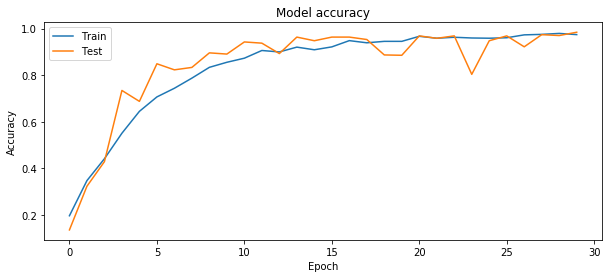

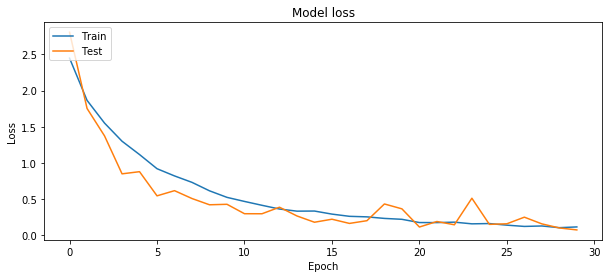

In [12]:
# Plot training & validation accuracy values
plt.figure(figsize=(10,4))
plt.plot(best_model.history.history['acc'])
plt.plot(best_model.history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(10,4))
plt.plot(best_model.history.history['loss'])
plt.plot(best_model.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### There is hypothesis that with SGD optimizer we can get better score, but accuracy is so close to 1 and it will be very difficult

Lets check it!

There is duplicated code, it is necessary for hyperas run correctly

In [4]:
def data():
    img_size = (32, 32)
    train_datagen = ImageDataGenerator(rescale = 1./255.)
    test_datagen = ImageDataGenerator(rescale = 1./255.,)

    train_generator = train_datagen.flow_from_directory(
        directory='./Synthetic_dataset/train',
        batch_size=32,   
        color_mode='grayscale',
        target_size=img_size)
    
    validation_generator = test_datagen.flow_from_directory(
        directory='./Synthetic_dataset/val',
        batch_size=32,
        color_mode='grayscale',
        target_size=img_size)
    
    test_generator = test_datagen.flow_from_directory(
        directory='./Synthetic_dataset/test',
        batch_size=32,
        color_mode='grayscale',
        target_size=img_size)
    
    return train_generator, validation_generator, test_generator

def model(train_generator, validation_generator, test_generator):
    
    nb_train_samples = 1000
    nb_validation_samples = 200
    nb_test_samples = 200
    epochs = 100
    batch_size = 32
    
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 1)))
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 1)))
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2),strides=2))
    model.add(Dropout({{uniform(0, 1)}}))
    
    conv_second = {{choice(['yes', 'no'])}}
    if conv_second == 'yes':
        model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
        model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
        model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(2, 2),strides=2))
        model.add(Dropout({{uniform(0, 1)}}))
    
    model.add(Flatten())
    model.add(Dense({{choice([32, 64, 128, 256])}}, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout({{uniform(0, 1)}}))
    
    dense_second = {{choice(['yes', 'no'])}}
    if dense_second == 'yes':
        model.add(Dense({{choice([32, 64, 128, 256])}}, activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout({{uniform(0, 1)}}))
    
    model.add(Dense(10, activation='softmax'))
        
    nesterov = {{choice([True, False])}}
    print('nesterov is', nesterov)
    sgd = SGD(lr = {{uniform(0, 0.3)}}, momentum = {{uniform(0, 1)}}, nesterov=nesterov)
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)

    model.fit_generator(
        train_generator,
        steps_per_epoch=nb_train_samples // batch_size,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=nb_validation_samples // batch_size,
        verbose=1,
        workers=1,#f you want multiprocessing change it
        use_multiprocessing=False,)
    
    score, acc = model.evaluate_generator(generator=test_generator, steps=nb_test_samples, verbose = 1)
    print('Test accuracy:', acc)
    
    return {'loss': -acc, 'status': STATUS_OK, 'model': model}

train_generator, validation_generator, test_generator = data()
best_run, best_model = optim.minimize(model=model,
                                      data=data,
                                      algo=tpe.suggest,
                                      max_evals=30,
                                      verbose=1,
                                      trials=Trials(),
                                      notebook_name='fonts_classifier')

print("Evalutation of best performing model:")
print(best_model.evaluate_generator(generator=test_generator, steps=200))
print("Best performing model chosen hyper-parameters:")
print(best_run) 

Found 1000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.
>>> Imports:
#coding=utf-8

from __future__ import print_function

try:
    from PIL import Image, ImageDraw, ImageFont
except:
    pass

try:
    import ttfquery.findsystem
except:
    pass

try:
    import string
except:
    pass

try:
    import ntpath
except:
    pass

try:
    import numpy as np
except:
    pass

try:
    import os
except:
    pass

try:
    import glob
except:
    pass

try:
    from sklearn.datasets import fetch_20newsgroups
except:
    pass

try:
    import numpy as np
except:
    pass

try:
    import keras
except:
    pass

try:
    import tensorflow as tf
except:
    pass

try:
    import os
except:
    pass

try:
    from hyperopt import Trials, STATUS_OK, tpe
except:
    pass

try:
    from hyperas import optim
except:
    pass

try:
    from hyperas.distributions import choice, uniform
except:
    pass

try:
    from keras.layer

Epoch 18/100
31/31 [==============================] - 0s 15ms/step - loss: 0.1877 - acc: 0.9436 - val_loss: 1.8416 - val_acc: 0.5677
Epoch 19/100
31/31 [==============================] - 0s 15ms/step - loss: 0.1550 - acc: 0.9447 - val_loss: 1.3134 - val_acc: 0.6615
Epoch 20/100
31/31 [==============================] - 0s 15ms/step - loss: 0.1604 - acc: 0.9397 - val_loss: 13.2638 - val_acc: 0.1771
Epoch 21/100
31/31 [==============================] - 0s 14ms/step - loss: 0.8434 - acc: 0.7157 - val_loss: 15.1107 - val_acc: 0.0625
Epoch 22/100
31/31 [==============================] - 0s 15ms/step - loss: 0.5528 - acc: 0.8028 - val_loss: 2.3827 - val_acc: 0.5000
Epoch 23/100
31/31 [==============================] - 0s 15ms/step - loss: 0.3699 - acc: 0.8681 - val_loss: 10.8506 - val_acc: 0.1875
Epoch 24/100
31/31 [==============================] - 0s 15ms/step - loss: 0.2195 - acc: 0.9123 - val_loss: 7.4912 - val_acc: 0.2031
Epoch 25/100
31/31 [==============================] - 0s 15ms/step

Epoch 40/100
31/31 [==============================] - 0s 15ms/step - loss: 1.3679 - acc: 0.4960 - val_loss: 3.1652 - val_acc: 0.1927
Epoch 41/100
31/31 [==============================] - 0s 15ms/step - loss: 1.4188 - acc: 0.4619 - val_loss: 3.2996 - val_acc: 0.2604
Epoch 42/100
31/31 [==============================] - 0s 15ms/step - loss: 1.4062 - acc: 0.4770 - val_loss: 2.7165 - val_acc: 0.2708
Epoch 43/100
31/31 [==============================] - 0s 15ms/step - loss: 1.4455 - acc: 0.4637 - val_loss: 2.9554 - val_acc: 0.2857
Epoch 44/100
31/31 [==============================] - 0s 15ms/step - loss: 1.3806 - acc: 0.5131 - val_loss: 1.8545 - val_acc: 0.3854
Epoch 45/100
31/31 [==============================] - 0s 15ms/step - loss: 1.3207 - acc: 0.5192 - val_loss: 1.7084 - val_acc: 0.3333
Epoch 46/100
31/31 [==============================] - 0s 15ms/step - loss: 1.3188 - acc: 0.5061 - val_loss: 1.9406 - val_acc: 0.3385
Epoch 47/100
31/31 [==============================] - 0s 15ms/step - 

nesterov is False
Epoch 1/100
31/31 [==============================] - 1s 44ms/step - loss: 2.3523 - acc: 0.1813 - val_loss: 2.0478 - val_acc: 0.1310
Epoch 2/100
31/31 [==============================] - 0s 12ms/step - loss: 1.9988 - acc: 0.2430 - val_loss: 2.0955 - val_acc: 0.1406
Epoch 3/100
31/31 [==============================] - 0s 16ms/step - loss: 1.9104 - acc: 0.2701 - val_loss: 1.7611 - val_acc: 0.2708
Epoch 4/100
31/31 [==============================] - 0s 16ms/step - loss: 1.8650 - acc: 0.2763 - val_loss: 1.9757 - val_acc: 0.3333
Epoch 5/100
31/31 [==============================] - 0s 16ms/step - loss: 1.7995 - acc: 0.3084 - val_loss: 1.4010 - val_acc: 0.5469
Epoch 6/100
31/31 [==============================] - 0s 15ms/step - loss: 1.8293 - acc: 0.3002 - val_loss: 1.5331 - val_acc: 0.4821
Epoch 7/100
31/31 [==============================] - 1s 16ms/step - loss: 1.6834 - acc: 0.3699 - val_loss: 1.4073 - val_acc: 0.5469
Epoch 8/100
31/31 [==============================] - 0s 15

Epoch 23/100
31/31 [==============================] - 0s 14ms/step - loss: 0.2800 - acc: 0.9074 - val_loss: 13.2147 - val_acc: 0.1131
Epoch 24/100
31/31 [==============================] - 0s 15ms/step - loss: 0.3343 - acc: 0.8789 - val_loss: 12.4449 - val_acc: 0.1302
Epoch 25/100
31/31 [==============================] - 0s 15ms/step - loss: 0.2617 - acc: 0.9204 - val_loss: 13.1253 - val_acc: 0.1406
Epoch 26/100
31/31 [==============================] - 0s 15ms/step - loss: 0.3107 - acc: 0.9185 - val_loss: 12.6236 - val_acc: 0.1823
Epoch 27/100
31/31 [==============================] - 0s 15ms/step - loss: 0.4497 - acc: 0.8760 - val_loss: 8.8674 - val_acc: 0.2865
Epoch 28/100
31/31 [==============================] - 0s 15ms/step - loss: 0.3746 - acc: 0.8881 - val_loss: 4.2857 - val_acc: 0.4821
Epoch 29/100
31/31 [==============================] - 0s 15ms/step - loss: 0.4218 - acc: 0.8813 - val_loss: 8.1687 - val_acc: 0.2604
Epoch 30/100
31/31 [==============================] - 0s 15ms/ste

31/31 [==============================] - 0s 15ms/step - loss: 0.9237 - acc: 0.6737 - val_loss: 0.8793 - val_acc: 0.6845
Epoch 45/100
31/31 [==============================] - 0s 15ms/step - loss: 0.8452 - acc: 0.6906 - val_loss: 2.2920 - val_acc: 0.4167
Epoch 46/100
31/31 [==============================] - 0s 16ms/step - loss: 0.8537 - acc: 0.6936 - val_loss: 0.5358 - val_acc: 0.7865
Epoch 47/100
31/31 [==============================] - 0s 15ms/step - loss: 0.8771 - acc: 0.6788 - val_loss: 0.9297 - val_acc: 0.6927
Epoch 48/100
31/31 [==============================] - 0s 16ms/step - loss: 0.7858 - acc: 0.7065 - val_loss: 0.3381 - val_acc: 0.9219
Epoch 49/100
31/31 [==============================] - 0s 15ms/step - loss: 0.7345 - acc: 0.7188 - val_loss: 1.1491 - val_acc: 0.5781
Epoch 50/100
31/31 [==============================] - 0s 15ms/step - loss: 0.7764 - acc: 0.7207 - val_loss: 2.4592 - val_acc: 0.4762
Epoch 51/100
31/31 [==============================] - 0s 15ms/step - loss: 0.7365 

Epoch 5/100
31/31 [==============================] - 1s 16ms/step - loss: 3.0692 - acc: 0.2078 - val_loss: 2.8803 - val_acc: 0.1927
Epoch 6/100
31/31 [==============================] - 0s 16ms/step - loss: 2.9403 - acc: 0.2105 - val_loss: 1.9093 - val_acc: 0.3438
Epoch 7/100
31/31 [==============================] - 0s 16ms/step - loss: 2.9078 - acc: 0.2157 - val_loss: 1.7945 - val_acc: 0.3274
Epoch 8/100
31/31 [==============================] - 0s 16ms/step - loss: 2.8153 - acc: 0.2280 - val_loss: 2.5157 - val_acc: 0.2708
Epoch 9/100
31/31 [==============================] - 0s 16ms/step - loss: 2.6220 - acc: 0.2340 - val_loss: 1.8402 - val_acc: 0.3594
Epoch 10/100
31/31 [==============================] - 0s 16ms/step - loss: 2.5934 - acc: 0.2258 - val_loss: 1.7880 - val_acc: 0.3229
Epoch 11/100
31/31 [==============================] - 0s 16ms/step - loss: 2.4990 - acc: 0.2462 - val_loss: 2.1051 - val_acc: 0.2917
Epoch 12/100
31/31 [==============================] - 0s 16ms/step - loss:

Epoch 27/100
31/31 [==============================] - 0s 16ms/step - loss: 1.9965 - acc: 0.2158 - val_loss: 1.7276 - val_acc: 0.3490
Epoch 28/100
31/31 [==============================] - 1s 16ms/step - loss: 1.9899 - acc: 0.2418 - val_loss: 1.8074 - val_acc: 0.2656
Epoch 29/100
31/31 [==============================] - 0s 16ms/step - loss: 1.9888 - acc: 0.2369 - val_loss: 1.6467 - val_acc: 0.3214
Epoch 30/100
31/31 [==============================] - 0s 16ms/step - loss: 1.9677 - acc: 0.2512 - val_loss: 1.9158 - val_acc: 0.2865
Epoch 31/100
31/31 [==============================] - 0s 16ms/step - loss: 2.0195 - acc: 0.2521 - val_loss: 2.0205 - val_acc: 0.2240
Epoch 32/100
31/31 [==============================] - 1s 16ms/step - loss: 2.0374 - acc: 0.2239 - val_loss: 1.8852 - val_acc: 0.2760
Epoch 33/100
31/31 [==============================] - 0s 16ms/step - loss: 2.0105 - acc: 0.2308 - val_loss: 1.7283 - val_acc: 0.3281
Epoch 34/100
31/31 [==============================] - 0s 16ms/step - 

Epoch 49/100
31/31 [==============================] - 1s 16ms/step - loss: 1.9249 - acc: 0.2651 - val_loss: 4.7249 - val_acc: 0.0833
Epoch 50/100
31/31 [==============================] - 1s 17ms/step - loss: 1.8770 - acc: 0.2692 - val_loss: 1.8539 - val_acc: 0.2760
Epoch 51/100
31/31 [==============================] - 1s 16ms/step - loss: 1.9396 - acc: 0.2571 - val_loss: 2.2282 - val_acc: 0.1310
Epoch 52/100
31/31 [==============================] - 1s 16ms/step - loss: 1.8722 - acc: 0.2821 - val_loss: 3.4117 - val_acc: 0.0885
Epoch 53/100
31/31 [==============================] - 0s 16ms/step - loss: 1.9740 - acc: 0.2350 - val_loss: 2.2763 - val_acc: 0.1354
Epoch 54/100
31/31 [==============================] - 1s 17ms/step - loss: 1.9092 - acc: 0.2732 - val_loss: 2.0264 - val_acc: 0.2292
Epoch 55/100
31/31 [==============================] - 0s 16ms/step - loss: 1.9141 - acc: 0.2582 - val_loss: 1.9176 - val_acc: 0.2344
Epoch 56/100
31/31 [==============================] - 1s 17ms/step - 

Epoch 10/100
31/31 [==============================] - 0s 16ms/step - loss: 0.5689 - acc: 0.8103 - val_loss: 1.7785 - val_acc: 0.5260
Epoch 11/100
31/31 [==============================] - 1s 17ms/step - loss: 0.4712 - acc: 0.8436 - val_loss: 1.8393 - val_acc: 0.4635
Epoch 12/100
31/31 [==============================] - 0s 16ms/step - loss: 0.6036 - acc: 0.8066 - val_loss: 14.0194 - val_acc: 0.1302
Epoch 13/100
31/31 [==============================] - 1s 16ms/step - loss: 0.5139 - acc: 0.8093 - val_loss: 13.9199 - val_acc: 0.0729
Epoch 14/100
31/31 [==============================] - 1s 16ms/step - loss: 0.4401 - acc: 0.8521 - val_loss: 13.9628 - val_acc: 0.0833
Epoch 15/100
31/31 [==============================] - 1s 17ms/step - loss: 0.4634 - acc: 0.8419 - val_loss: 0.6875 - val_acc: 0.7865
Epoch 16/100
31/31 [==============================] - 0s 16ms/step - loss: 0.3809 - acc: 0.8689 - val_loss: 10.0213 - val_acc: 0.1198
Epoch 17/100
31/31 [==============================] - 1s 17ms/ste

Epoch 32/100
31/31 [==============================] - 0s 16ms/step - loss: 1.5873 - acc: 0.4082 - val_loss: 2.1963 - val_acc: 0.2135
Epoch 33/100
31/31 [==============================] - 1s 16ms/step - loss: 1.6212 - acc: 0.3669 - val_loss: 1.5681 - val_acc: 0.4010
Epoch 34/100
31/31 [==============================] - 0s 16ms/step - loss: 1.6511 - acc: 0.3649 - val_loss: 1.4339 - val_acc: 0.4896
Epoch 35/100
31/31 [==============================] - 1s 16ms/step - loss: 1.6459 - acc: 0.3591 - val_loss: 1.6327 - val_acc: 0.3750
Epoch 36/100
31/31 [==============================] - 0s 16ms/step - loss: 1.5875 - acc: 0.3852 - val_loss: 1.3129 - val_acc: 0.5260
Epoch 37/100
31/31 [==============================] - 1s 16ms/step - loss: 1.6232 - acc: 0.3951 - val_loss: 1.4832 - val_acc: 0.4740
Epoch 38/100
31/31 [==============================] - 1s 16ms/step - loss: 1.6606 - acc: 0.3590 - val_loss: 1.7581 - val_acc: 0.3177
Epoch 39/100
31/31 [==============================] - 0s 16ms/step - 

Epoch 54/100
31/31 [==============================] - 1s 17ms/step - loss: 0.9296 - acc: 0.6492 - val_loss: 0.6666 - val_acc: 0.7552
Epoch 55/100
31/31 [==============================] - 1s 18ms/step - loss: 0.8832 - acc: 0.6703 - val_loss: 0.6232 - val_acc: 0.7552
Epoch 56/100
31/31 [==============================] - 1s 17ms/step - loss: 1.3473 - acc: 0.5090 - val_loss: 1.8091 - val_acc: 0.4271
Epoch 57/100
31/31 [==============================] - 1s 17ms/step - loss: 1.2836 - acc: 0.5141 - val_loss: 14.7749 - val_acc: 0.0833
Epoch 58/100
31/31 [==============================] - 1s 17ms/step - loss: 1.6032 - acc: 0.4043 - val_loss: 3.6885 - val_acc: 0.1250
Epoch 59/100
31/31 [==============================] - 1s 17ms/step - loss: 1.4765 - acc: 0.4577 - val_loss: 2.2836 - val_acc: 0.3385
Epoch 60/100
31/31 [==============================] - 1s 18ms/step - loss: 1.3576 - acc: 0.5020 - val_loss: 1.4227 - val_acc: 0.5052
Epoch 61/100
31/31 [==============================] - 1s 18ms/step -

Epoch 15/100
31/31 [==============================] - 1s 18ms/step - loss: 0.1473 - acc: 0.9638 - val_loss: 0.1478 - val_acc: 0.9762
Epoch 16/100
31/31 [==============================] - 1s 19ms/step - loss: 0.1622 - acc: 0.9598 - val_loss: 0.3768 - val_acc: 0.8958
Epoch 17/100
31/31 [==============================] - 1s 19ms/step - loss: 0.1229 - acc: 0.9758 - val_loss: 0.1207 - val_acc: 0.9792
Epoch 18/100
31/31 [==============================] - 1s 18ms/step - loss: 0.1499 - acc: 0.9650 - val_loss: 0.1798 - val_acc: 0.9531
Epoch 19/100
31/31 [==============================] - 1s 17ms/step - loss: 0.1072 - acc: 0.9839 - val_loss: 0.3282 - val_acc: 0.9062
Epoch 20/100
31/31 [==============================] - 1s 18ms/step - loss: 0.0940 - acc: 0.9849 - val_loss: 0.2587 - val_acc: 0.9107
Epoch 21/100
31/31 [==============================] - 1s 18ms/step - loss: 0.0854 - acc: 0.9889 - val_loss: 0.1013 - val_acc: 0.9688
Epoch 22/100
31/31 [==============================] - 1s 17ms/step - 

Epoch 37/100
31/31 [==============================] - 0s 16ms/step - loss: 0.0612 - acc: 0.9809 - val_loss: 5.9023 - val_acc: 0.3750
Epoch 38/100
31/31 [==============================] - 1s 17ms/step - loss: 0.0335 - acc: 0.9899 - val_loss: 0.1793 - val_acc: 0.9688
Epoch 39/100
31/31 [==============================] - 1s 17ms/step - loss: 0.0839 - acc: 0.9771 - val_loss: 13.6472 - val_acc: 0.1094
Epoch 40/100
31/31 [==============================] - 1s 17ms/step - loss: 0.1570 - acc: 0.9446 - val_loss: 3.6650 - val_acc: 0.5104
Epoch 41/100
31/31 [==============================] - 0s 16ms/step - loss: 0.0450 - acc: 0.9869 - val_loss: 1.2745 - val_acc: 0.7604
Epoch 42/100
31/31 [==============================] - 1s 17ms/step - loss: 0.0532 - acc: 0.9769 - val_loss: 0.4091 - val_acc: 0.9048
Epoch 43/100
31/31 [==============================] - 1s 16ms/step - loss: 0.0415 - acc: 0.9869 - val_loss: 0.9211 - val_acc: 0.7760
Epoch 44/100
31/31 [==============================] - 1s 17ms/step -

Epoch 59/100
31/31 [==============================] - 1s 17ms/step - loss: 0.1074 - acc: 0.9758 - val_loss: 0.1226 - val_acc: 0.9792
Epoch 60/100
31/31 [==============================] - 1s 16ms/step - loss: 0.1049 - acc: 0.9818 - val_loss: 0.1860 - val_acc: 0.9375
Epoch 61/100
31/31 [==============================] - 1s 17ms/step - loss: 0.1145 - acc: 0.9659 - val_loss: 0.3230 - val_acc: 0.8906
Epoch 62/100
31/31 [==============================] - 1s 17ms/step - loss: 0.1235 - acc: 0.9557 - val_loss: 0.1079 - val_acc: 0.9740
Epoch 63/100
31/31 [==============================] - 1s 17ms/step - loss: 0.0979 - acc: 0.9788 - val_loss: 0.6776 - val_acc: 0.7857
Epoch 64/100
31/31 [==============================] - 1s 16ms/step - loss: 0.0940 - acc: 0.9729 - val_loss: 0.4116 - val_acc: 0.8750
Epoch 65/100
31/31 [==============================] - 1s 17ms/step - loss: 0.1107 - acc: 0.9688 - val_loss: 0.1863 - val_acc: 0.9479
Epoch 66/100
31/31 [==============================] - 1s 17ms/step - 

Epoch 20/100
31/31 [==============================] - 1s 17ms/step - loss: 0.1773 - acc: 0.9425 - val_loss: 0.1170 - val_acc: 0.9635
Epoch 21/100
31/31 [==============================] - 1s 17ms/step - loss: 0.2074 - acc: 0.9295 - val_loss: 0.4648 - val_acc: 0.8690
Epoch 22/100
31/31 [==============================] - 1s 17ms/step - loss: 0.1883 - acc: 0.9427 - val_loss: 0.7574 - val_acc: 0.7552
Epoch 23/100
31/31 [==============================] - 1s 17ms/step - loss: 0.2552 - acc: 0.9357 - val_loss: 0.4370 - val_acc: 0.8542
Epoch 24/100
31/31 [==============================] - 1s 17ms/step - loss: 0.1703 - acc: 0.9446 - val_loss: 1.8154 - val_acc: 0.5104
Epoch 25/100
31/31 [==============================] - 1s 17ms/step - loss: 0.1533 - acc: 0.9428 - val_loss: 0.4978 - val_acc: 0.8281
Epoch 26/100
31/31 [==============================] - 1s 17ms/step - loss: 0.1871 - acc: 0.9397 - val_loss: 0.2540 - val_acc: 0.9226
Epoch 27/100
31/31 [==============================] - 1s 17ms/step - 

Epoch 42/100
31/31 [==============================] - 1s 17ms/step - loss: 0.3692 - acc: 0.8619 - val_loss: 2.2654 - val_acc: 0.4844
Epoch 43/100
31/31 [==============================] - 1s 18ms/step - loss: 0.3173 - acc: 0.8932 - val_loss: 0.3853 - val_acc: 0.8631
Epoch 44/100
31/31 [==============================] - 1s 18ms/step - loss: 0.4906 - acc: 0.8248 - val_loss: 0.6205 - val_acc: 0.8021
Epoch 45/100
31/31 [==============================] - 1s 18ms/step - loss: 0.3498 - acc: 0.8769 - val_loss: 0.4803 - val_acc: 0.8229
Epoch 46/100
31/31 [==============================] - 1s 18ms/step - loss: 0.3364 - acc: 0.8770 - val_loss: 0.9091 - val_acc: 0.6719
Epoch 47/100
31/31 [==============================] - 1s 18ms/step - loss: 0.3968 - acc: 0.8578 - val_loss: 3.7488 - val_acc: 0.3906
Epoch 48/100
31/31 [==============================] - 1s 17ms/step - loss: 0.3019 - acc: 0.9002 - val_loss: 0.6326 - val_acc: 0.7798
Epoch 49/100
31/31 [==============================] - 1s 18ms/step - 

Epoch 3/100
31/31 [==============================] - 1s 17ms/step - loss: 0.9814 - acc: 0.6372 - val_loss: 13.2897 - val_acc: 0.1406
Epoch 4/100
31/31 [==============================] - 1s 18ms/step - loss: 0.8019 - acc: 0.7179 - val_loss: 12.5101 - val_acc: 0.2240
Epoch 5/100
31/31 [==============================] - 1s 17ms/step - loss: 0.6648 - acc: 0.7489 - val_loss: 12.7281 - val_acc: 0.1979
Epoch 6/100
31/31 [==============================] - 1s 17ms/step - loss: 0.6163 - acc: 0.7714 - val_loss: 10.9801 - val_acc: 0.1845
Epoch 7/100
31/31 [==============================] - 1s 17ms/step - loss: 0.4669 - acc: 0.8279 - val_loss: 8.3804 - val_acc: 0.1458
Epoch 8/100
31/31 [==============================] - 1s 18ms/step - loss: 0.3889 - acc: 0.8567 - val_loss: 8.5757 - val_acc: 0.2031
Epoch 9/100
31/31 [==============================] - 1s 18ms/step - loss: 0.3781 - acc: 0.8581 - val_loss: 5.5722 - val_acc: 0.2292
Epoch 10/100
31/31 [==============================] - 1s 18ms/step - los

Epoch 25/100
31/31 [==============================] - 1s 18ms/step - loss: 1.3012 - acc: 0.5030 - val_loss: 1.2025 - val_acc: 0.5208
Epoch 26/100
31/31 [==============================] - 1s 18ms/step - loss: 1.3238 - acc: 0.5294 - val_loss: 6.3702 - val_acc: 0.1146
Epoch 27/100
31/31 [==============================] - 1s 18ms/step - loss: 1.3470 - acc: 0.5244 - val_loss: 4.2868 - val_acc: 0.1310
Epoch 28/100
31/31 [==============================] - 1s 18ms/step - loss: 1.3153 - acc: 0.5030 - val_loss: 1.3568 - val_acc: 0.4792
Epoch 29/100
31/31 [==============================] - 1s 18ms/step - loss: 1.2669 - acc: 0.5012 - val_loss: 2.0304 - val_acc: 0.3385
Epoch 30/100
31/31 [==============================] - 1s 18ms/step - loss: 1.2145 - acc: 0.5537 - val_loss: 0.7175 - val_acc: 0.8594
Epoch 31/100
31/31 [==============================] - 1s 18ms/step - loss: 1.3685 - acc: 0.4770 - val_loss: 6.4544 - val_acc: 0.0729
Epoch 32/100
31/31 [==============================] - 1s 17ms/step - 

Epoch 47/100
31/31 [==============================] - 1s 18ms/step - loss: 0.0281 - acc: 0.9909 - val_loss: 0.1948 - val_acc: 0.9531
Epoch 48/100
31/31 [==============================] - 1s 18ms/step - loss: 0.0456 - acc: 0.9809 - val_loss: 2.0748 - val_acc: 0.6667
Epoch 49/100
31/31 [==============================] - 1s 18ms/step - loss: 0.1854 - acc: 0.9539 - val_loss: 0.9654 - val_acc: 0.8274
Epoch 50/100
31/31 [==============================] - 1s 18ms/step - loss: 0.0666 - acc: 0.9699 - val_loss: 1.2926 - val_acc: 0.7917
Epoch 51/100
31/31 [==============================] - 1s 19ms/step - loss: 0.1222 - acc: 0.9708 - val_loss: 13.3295 - val_acc: 0.1198
Epoch 52/100
31/31 [==============================] - 1s 19ms/step - loss: 0.0537 - acc: 0.9778 - val_loss: 0.0232 - val_acc: 0.9948
Epoch 53/100
31/31 [==============================] - 1s 18ms/step - loss: 0.0442 - acc: 0.9839 - val_loss: 1.7844 - val_acc: 0.6875
Epoch 54/100
31/31 [==============================] - 1s 18ms/step -

Epoch 8/100
31/31 [==============================] - 1s 18ms/step - loss: 2.6584 - acc: 0.2329 - val_loss: 2.6599 - val_acc: 0.1458
Epoch 9/100
31/31 [==============================] - 1s 19ms/step - loss: 2.7326 - acc: 0.2318 - val_loss: 13.4716 - val_acc: 0.1146
Epoch 10/100
31/31 [==============================] - 1s 18ms/step - loss: 2.7021 - acc: 0.2129 - val_loss: 8.1774 - val_acc: 0.0990
Epoch 11/100
31/31 [==============================] - 1s 18ms/step - loss: 2.6937 - acc: 0.2197 - val_loss: 4.1599 - val_acc: 0.0938
Epoch 12/100
31/31 [==============================] - 1s 18ms/step - loss: 2.4842 - acc: 0.2498 - val_loss: 2.1325 - val_acc: 0.1786
Epoch 13/100
31/31 [==============================] - 1s 18ms/step - loss: 2.3732 - acc: 0.2632 - val_loss: 1.8191 - val_acc: 0.2865
Epoch 14/100
31/31 [==============================] - 1s 18ms/step - loss: 2.3712 - acc: 0.2360 - val_loss: 1.5350 - val_acc: 0.4219
Epoch 15/100
31/31 [==============================] - 1s 18ms/step - l

Epoch 30/100
31/31 [==============================] - 1s 18ms/step - loss: 0.2702 - acc: 0.9044 - val_loss: 4.0631 - val_acc: 0.4167
Epoch 31/100
31/31 [==============================] - 1s 18ms/step - loss: 0.3120 - acc: 0.9093 - val_loss: 3.8485 - val_acc: 0.4167
Epoch 32/100
31/31 [==============================] - 1s 18ms/step - loss: 0.2072 - acc: 0.9344 - val_loss: 0.7324 - val_acc: 0.8542
Epoch 33/100
31/31 [==============================] - 1s 18ms/step - loss: 0.2126 - acc: 0.9234 - val_loss: 2.2475 - val_acc: 0.5312
Epoch 34/100
31/31 [==============================] - 1s 18ms/step - loss: 0.2220 - acc: 0.9144 - val_loss: 0.9282 - val_acc: 0.7381
Epoch 35/100
31/31 [==============================] - 1s 18ms/step - loss: 0.2334 - acc: 0.9195 - val_loss: 0.3663 - val_acc: 0.8906
Epoch 36/100
31/31 [==============================] - 1s 19ms/step - loss: 0.2123 - acc: 0.9124 - val_loss: 2.8346 - val_acc: 0.4844
Epoch 37/100
31/31 [==============================] - 1s 18ms/step - 

Epoch 52/100
31/31 [==============================] - 1s 19ms/step - loss: 0.0140 - acc: 0.9960 - val_loss: 0.1147 - val_acc: 0.9844
Epoch 53/100
31/31 [==============================] - 1s 18ms/step - loss: 0.0181 - acc: 0.9970 - val_loss: 0.1317 - val_acc: 0.9688
Epoch 54/100
31/31 [==============================] - 1s 18ms/step - loss: 0.0585 - acc: 0.9831 - val_loss: 0.1132 - val_acc: 0.9635
Epoch 55/100
31/31 [==============================] - 1s 18ms/step - loss: 0.0278 - acc: 0.9909 - val_loss: 0.1966 - val_acc: 0.9643
Epoch 56/100
31/31 [==============================] - 1s 19ms/step - loss: 0.0249 - acc: 0.9930 - val_loss: 0.1222 - val_acc: 0.9531
Epoch 57/100
31/31 [==============================] - 1s 18ms/step - loss: 0.0127 - acc: 0.9970 - val_loss: 0.0681 - val_acc: 0.9740
Epoch 58/100
31/31 [==============================] - 1s 18ms/step - loss: 0.0192 - acc: 0.9950 - val_loss: 0.1095 - val_acc: 0.9896
Epoch 59/100
31/31 [==============================] - 1s 18ms/step - 

Epoch 13/100
31/31 [==============================] - 1s 18ms/step - loss: 0.9097 - acc: 0.6461 - val_loss: 3.2813 - val_acc: 0.3155
Epoch 14/100
31/31 [==============================] - 1s 19ms/step - loss: 0.9595 - acc: 0.6434 - val_loss: 9.5830 - val_acc: 0.2135
Epoch 15/100
31/31 [==============================] - 1s 19ms/step - loss: 0.9664 - acc: 0.6472 - val_loss: 5.5737 - val_acc: 0.4115
Epoch 16/100
31/31 [==============================] - 1s 19ms/step - loss: 0.8586 - acc: 0.6795 - val_loss: 9.4880 - val_acc: 0.2031
Epoch 17/100
31/31 [==============================] - 1s 18ms/step - loss: 0.8721 - acc: 0.6684 - val_loss: 10.9711 - val_acc: 0.1146
Epoch 18/100
31/31 [==============================] - 1s 18ms/step - loss: 0.8369 - acc: 0.7066 - val_loss: 7.7605 - val_acc: 0.1905
Epoch 19/100
31/31 [==============================] - 1s 19ms/step - loss: 0.7185 - acc: 0.7288 - val_loss: 0.9247 - val_acc: 0.6979
Epoch 20/100
31/31 [==============================] - 1s 18ms/step -

Epoch 35/100
31/31 [==============================] - 1s 18ms/step - loss: 0.1642 - acc: 0.9365 - val_loss: 1.8871 - val_acc: 0.6012
Epoch 36/100
31/31 [==============================] - 1s 18ms/step - loss: 0.1562 - acc: 0.9507 - val_loss: 0.8343 - val_acc: 0.7812
Epoch 37/100
31/31 [==============================] - 1s 18ms/step - loss: 0.2026 - acc: 0.9446 - val_loss: 0.5228 - val_acc: 0.8125
Epoch 38/100
31/31 [==============================] - 1s 19ms/step - loss: 0.1682 - acc: 0.9367 - val_loss: 6.8867 - val_acc: 0.3021
Epoch 39/100
31/31 [==============================] - 1s 19ms/step - loss: 0.2295 - acc: 0.9295 - val_loss: 5.6831 - val_acc: 0.4167
Epoch 40/100
31/31 [==============================] - 1s 18ms/step - loss: 0.1510 - acc: 0.9557 - val_loss: 1.1056 - val_acc: 0.7976
Epoch 41/100
31/31 [==============================] - 1s 18ms/step - loss: 0.1225 - acc: 0.9596 - val_loss: 1.7249 - val_acc: 0.6250
Epoch 42/100
31/31 [==============================] - 1s 19ms/step - 

Epoch 57/100
31/31 [==============================] - 1s 18ms/step - loss: 0.0342 - acc: 0.9899 - val_loss: 0.1500 - val_acc: 0.9688
Epoch 58/100
31/31 [==============================] - 1s 18ms/step - loss: 0.0324 - acc: 0.9889 - val_loss: 0.2998 - val_acc: 0.9062
Epoch 59/100
31/31 [==============================] - 1s 18ms/step - loss: 0.0523 - acc: 0.9769 - val_loss: 0.5883 - val_acc: 0.8594
Epoch 60/100
31/31 [==============================] - 1s 19ms/step - loss: 0.0421 - acc: 0.9869 - val_loss: 0.0570 - val_acc: 0.9792
Epoch 61/100
31/31 [==============================] - 1s 18ms/step - loss: 0.0361 - acc: 0.9859 - val_loss: 0.4974 - val_acc: 0.8542
Epoch 62/100
31/31 [==============================] - 1s 19ms/step - loss: 0.0479 - acc: 0.9849 - val_loss: 0.1030 - val_acc: 0.9821
Epoch 63/100
31/31 [==============================] - 1s 18ms/step - loss: 0.0659 - acc: 0.9748 - val_loss: 0.5935 - val_acc: 0.8646
Epoch 64/100
31/31 [==============================] - 1s 18ms/step - 

Epoch 18/100
31/31 [==============================] - 1s 18ms/step - loss: 1.6969 - acc: 0.3378 - val_loss: 2.0322 - val_acc: 0.2292
Epoch 19/100
31/31 [==============================] - 1s 19ms/step - loss: 1.7020 - acc: 0.3650 - val_loss: 1.4412 - val_acc: 0.4167
Epoch 20/100
31/31 [==============================] - 1s 18ms/step - loss: 1.6900 - acc: 0.3368 - val_loss: 2.9763 - val_acc: 0.1562
Epoch 21/100
31/31 [==============================] - 1s 19ms/step - loss: 1.7071 - acc: 0.3761 - val_loss: 1.5018 - val_acc: 0.4115
Epoch 22/100
31/31 [==============================] - 1s 19ms/step - loss: 1.6797 - acc: 0.3821 - val_loss: 3.0272 - val_acc: 0.1406
Epoch 23/100
31/31 [==============================] - 1s 19ms/step - loss: 1.6899 - acc: 0.3599 - val_loss: 1.6615 - val_acc: 0.3906
Epoch 24/100
31/31 [==============================] - 1s 18ms/step - loss: 1.6991 - acc: 0.3659 - val_loss: 1.4679 - val_acc: 0.4271
Epoch 25/100
31/31 [==============================] - 1s 19ms/step - 

31/31 [==============================] - 1s 20ms/step - loss: 14.3960 - acc: 0.1068 - val_loss: 14.1873 - val_acc: 0.1198
Epoch 40/100
31/31 [==============================] - 1s 19ms/step - loss: 14.4515 - acc: 0.1029 - val_loss: 14.6070 - val_acc: 0.0938
Epoch 41/100
31/31 [==============================] - 1s 19ms/step - loss: 14.5245 - acc: 0.0989 - val_loss: 14.6790 - val_acc: 0.0893
Epoch 42/100
31/31 [==============================] - 1s 20ms/step - loss: 14.3798 - acc: 0.1078 - val_loss: 14.1873 - val_acc: 0.1198
Epoch 43/100
31/31 [==============================] - 1s 19ms/step - loss: 14.7522 - acc: 0.0847 - val_loss: 14.8589 - val_acc: 0.0781
Epoch 44/100
31/31 [==============================] - 1s 19ms/step - loss: 14.2675 - acc: 0.1148 - val_loss: 14.3552 - val_acc: 0.1094
Epoch 45/100
31/31 [==============================] - 1s 18ms/step - loss: 14.7847 - acc: 0.0827 - val_loss: 14.6070 - val_acc: 0.0938
Epoch 46/100
31/31 [==============================] - 1s 19ms/step -

Epoch 100/100
200/200 [==============================] - 3s 15ms/step
Test accuracy: 0.101662404092
nesterov is True
Epoch 1/100
31/31 [==============================] - 3s 97ms/step - loss: 2.0292 - acc: 0.3778 - val_loss: 12.6565 - val_acc: 0.1094
Epoch 2/100
31/31 [==============================] - 0s 15ms/step - loss: 1.2161 - acc: 0.5645 - val_loss: 4.7951 - val_acc: 0.1667
Epoch 3/100
31/31 [==============================] - 1s 19ms/step - loss: 1.0455 - acc: 0.6131 - val_loss: 14.5231 - val_acc: 0.0990
Epoch 4/100
31/31 [==============================] - 1s 18ms/step - loss: 1.0958 - acc: 0.6289 - val_loss: 13.7838 - val_acc: 0.0952
Epoch 5/100
31/31 [==============================] - 1s 19ms/step - loss: 0.8447 - acc: 0.6853 - val_loss: 14.7749 - val_acc: 0.0833
Epoch 6/100
31/31 [==============================] - 1s 19ms/step - loss: 0.7375 - acc: 0.7188 - val_loss: 14.5231 - val_acc: 0.0990
Epoch 7/100
31/31 [==============================] - 1s 19ms/step - loss: 0.6437 - acc

Epoch 61/100
31/31 [==============================] - 1s 19ms/step - loss: 0.0576 - acc: 0.9798 - val_loss: 8.2277 - val_acc: 0.3073
Epoch 62/100
31/31 [==============================] - 1s 19ms/step - loss: 0.0568 - acc: 0.9840 - val_loss: 2.3774 - val_acc: 0.6354
Epoch 63/100
31/31 [==============================] - 1s 19ms/step - loss: 0.0481 - acc: 0.9860 - val_loss: 14.7339 - val_acc: 0.0774
Epoch 64/100
31/31 [==============================] - 1s 19ms/step - loss: 0.0631 - acc: 0.9809 - val_loss: 1.6557 - val_acc: 0.7083
Epoch 65/100
31/31 [==============================] - 1s 19ms/step - loss: 0.0418 - acc: 0.9849 - val_loss: 1.7556 - val_acc: 0.7135
Epoch 66/100
31/31 [==============================] - 1s 19ms/step - loss: 0.0432 - acc: 0.9819 - val_loss: 0.1326 - val_acc: 0.9740
Epoch 67/100
31/31 [==============================] - 1s 19ms/step - loss: 0.0330 - acc: 0.9909 - val_loss: 0.1441 - val_acc: 0.9792
Epoch 68/100
31/31 [==============================] - 1s 18ms/step -

Epoch 83/100
31/31 [==============================] - 1s 19ms/step - loss: 0.3715 - acc: 0.8750 - val_loss: 0.4613 - val_acc: 0.8438
Epoch 84/100
31/31 [==============================] - 1s 20ms/step - loss: 0.3728 - acc: 0.8630 - val_loss: 0.7820 - val_acc: 0.7917
Epoch 85/100
31/31 [==============================] - 1s 20ms/step - loss: 0.4019 - acc: 0.8711 - val_loss: 0.7225 - val_acc: 0.7969
Epoch 86/100
31/31 [==============================] - 1s 19ms/step - loss: 0.4526 - acc: 0.8410 - val_loss: 0.5656 - val_acc: 0.7760
Epoch 87/100
31/31 [==============================] - 1s 20ms/step - loss: 0.3905 - acc: 0.8689 - val_loss: 0.2814 - val_acc: 0.9062
Epoch 88/100
31/31 [==============================] - 1s 20ms/step - loss: 0.4523 - acc: 0.8670 - val_loss: 0.7879 - val_acc: 0.8021
Epoch 89/100
31/31 [==============================] - 1s 19ms/step - loss: 0.4141 - acc: 0.8500 - val_loss: 0.3586 - val_acc: 0.8854
Epoch 90/100
31/31 [==============================] - 1s 19ms/step - 

Epoch 44/100
31/31 [==============================] - 1s 19ms/step - loss: 0.0406 - acc: 0.9839 - val_loss: 0.1557 - val_acc: 0.9635
Epoch 45/100
31/31 [==============================] - 1s 19ms/step - loss: 0.0384 - acc: 0.9859 - val_loss: 0.1929 - val_acc: 0.9531
Epoch 46/100
31/31 [==============================] - 1s 20ms/step - loss: 0.0565 - acc: 0.9828 - val_loss: 0.2700 - val_acc: 0.9167
Epoch 47/100
31/31 [==============================] - 1s 19ms/step - loss: 0.0354 - acc: 0.9919 - val_loss: 0.2410 - val_acc: 0.9405
Epoch 48/100
31/31 [==============================] - 1s 19ms/step - loss: 0.0418 - acc: 0.9860 - val_loss: 0.1530 - val_acc: 0.9635
Epoch 49/100
31/31 [==============================] - 1s 19ms/step - loss: 0.0332 - acc: 0.9889 - val_loss: 0.1101 - val_acc: 0.9740
Epoch 50/100
31/31 [==============================] - 1s 19ms/step - loss: 0.0530 - acc: 0.9839 - val_loss: 0.2406 - val_acc: 0.9531
Epoch 51/100
31/31 [==============================] - 1s 19ms/step - 

In [5]:
best_model.save_weights('best_model_top_sgd_weights')
best_model.save('best_model_top_sgd')

In [6]:
best_model_sgd = keras.models.load_model('best_model_top_sgd')

### Evaluate test score of best_model_sgd

In [8]:
acc = []
for i in range(5):
    acc.append(best_model_sgd.evaluate_generator(generator=test_generator, steps=200, verbose = 1)[1])
print(np.mean(acc))

200/200 [==============================] - 4s 20ms/step
0.9889386189258312


### Training and validation visualization

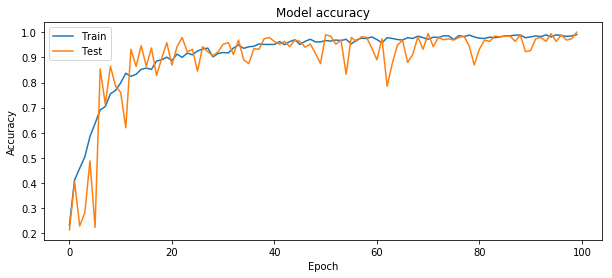

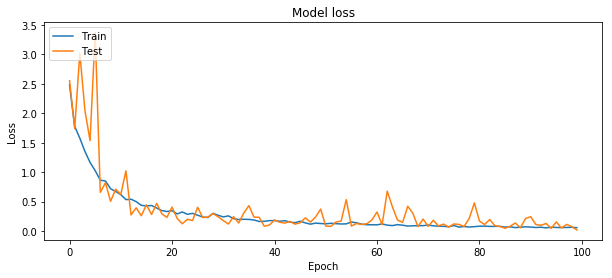

In [6]:
# Plot training & validation accuracy values
plt.figure(figsize=(10,4))
plt.plot(best_model.history.history['acc'])
plt.plot(best_model.history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(10,4))
plt.plot(best_model.history.history['loss'])
plt.plot(best_model.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


Lets try train already trained model

In [11]:
history, score = datagen(best_model_sgd,'./Synthetic_dataset/train', './Synthetic_dataset/val',\
                         './Synthetic_dataset/test', verbose=1, img_size=(32,32), batch_size=32,\
                         epochs=100, nb_train_samples=1000, nb_validation_samples=200, nb_test_samples = 200)

Found 1000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.
Epoch 1/100
31/31 [==============================] - 2s 58ms/step - loss: 0.0339 - acc: 0.9910 - val_loss: 0.1249 - val_acc: 0.9896
Epoch 2/100
31/31 [==============================] - 2s 59ms/step - loss: 0.0278 - acc: 0.9919 - val_loss: 0.0614 - val_acc: 0.9896
Epoch 3/100
31/31 [==============================] - 2s 59ms/step - loss: 0.0266 - acc: 0.9929 - val_loss: 0.0033 - val_acc: 1.0000
Epoch 4/100
31/31 [==============================] - 2s 58ms/step - loss: 0.0294 - acc: 0.9929 - val_loss: 0.1383 - val_acc: 0.9583
Epoch 5/100
31/31 [==============================] - 2s 58ms/step - loss: 0.0208 - acc: 0.9970 - val_loss: 0.1555 - val_acc: 0.9531
Epoch 6/100
31/31 [==============================] - 2s 62ms/step - loss: 0.0178 - acc: 0.9961 - val_loss: 0.0080 - val_acc: 1.0000
Epoch 7/100
31/31 [==============================] - 2s 58ms/step - loss: 0.033

Epoch 62/100
31/31 [==============================] - 2s 58ms/step - loss: 0.0232 - acc: 0.9920 - val_loss: 0.0142 - val_acc: 0.9948
Epoch 63/100
31/31 [==============================] - 2s 59ms/step - loss: 0.0138 - acc: 0.9970 - val_loss: 0.0656 - val_acc: 0.9844
Epoch 64/100
31/31 [==============================] - 2s 58ms/step - loss: 0.0187 - acc: 0.9980 - val_loss: 0.0074 - val_acc: 1.0000
Epoch 65/100
31/31 [==============================] - 2s 61ms/step - loss: 0.0181 - acc: 0.9980 - val_loss: 0.1114 - val_acc: 0.9740
Epoch 66/100
31/31 [==============================] - 2s 61ms/step - loss: 0.0194 - acc: 0.9960 - val_loss: 0.0518 - val_acc: 0.9948
Epoch 67/100
31/31 [==============================] - 2s 59ms/step - loss: 0.0208 - acc: 0.9970 - val_loss: 0.0598 - val_acc: 0.9792
Epoch 68/100
31/31 [==============================] - 2s 58ms/step - loss: 0.0155 - acc: 0.9980 - val_loss: 0.0153 - val_acc: 1.0000
Epoch 69/100
31/31 [==============================] - 2s 61ms/step - 

### Evaluate test score of best_model_sgd with one more training

In [12]:
acc_sgd = []
for i in range(5):
    acc_sgd.append(best_model_sgd.evaluate_generator(generator=test_generator, steps=200, verbose = 1)[1])
print(np.mean(acc_sgd))

200/200 [==============================] - 4s 19ms/step
0.9950447570332482


In [15]:
best_model_sgd.save_weights('best_model_top_sgd_weights_second')
best_model_sgd.save('best_model_top_sgd_second')

### Training and validation visualization

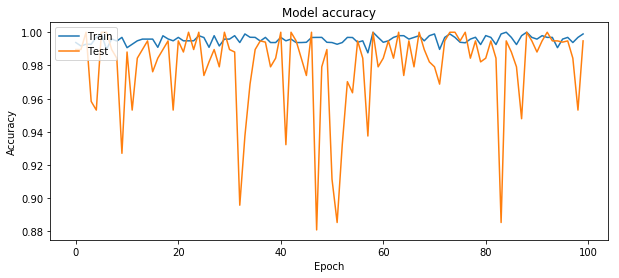

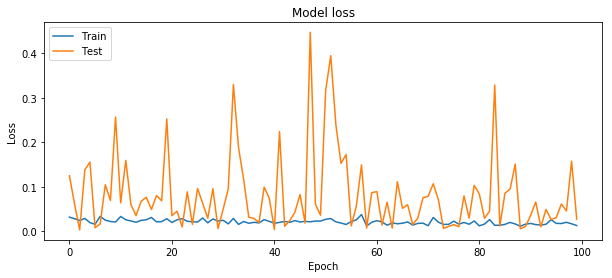

In [13]:
# Plot training & validation accuracy values
plt.figure(figsize=(10,4))
plt.plot(best_model_sgd.history.history['acc'])
plt.plot(best_model_sgd.history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(10,4))
plt.plot(best_model_sgd.history.history['loss'])
plt.plot(best_model_sgd.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Conclsuion

We trained 2 models with identity architecture:

    INPUT - [CONV - CONV - CONV - POOL]*2 - [DENSE]*2 - OUTPUT
    
One has trained with Adam optimizator, another with SGD.

### Results:
    
With Adam optimizer:

In [17]:
print('Test accuracy is', np.mean(acc_adam))

('Test accuracy is', 0.9930306905370843)


With SGD optimizer:

In [18]:
print('Test accuracy is', np.mean(acc_sgd))

('Test accuracy is', 0.9950447570332482)
